<a href="https://colab.research.google.com/github/kik2025/CarrerPath.io/blob/main/Erika_Sustainable_AI_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===== EDA: CARBON-EFFICIENT AI FOR SUSTAINABLE EDUCATION =====
# Student: Erika Rocha Berthely - MSCAIBUS1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA")
print("="*60)

🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA


In [2]:
# ===== 1. DATA COLLECTION AND CONSTRUCTION =====

# Set random seed for reproducibility
np.random.seed(42)

# Define country profiles based on real-world data
countries_data = {
    'Spain': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 90},
    'France': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 92},
    'Germany': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 95},
    'Brazil': {'region': 'America', 'gdp_level': 'Medium', 'base_infra': 70},
    'Mexico': {'region': 'America', 'gdp_level': 'Medium', 'base_infra': 68},
    'Japan': {'region': 'Asia', 'gdp_level': 'High', 'base_infra': 98},
    'India': {'region': 'Asia', 'gdp_level': 'Medium', 'base_infra': 65},
    'Bangladesh': {'region': 'Asia', 'gdp_level': 'Low', 'base_infra': 55},
    'Nigeria': {'region': 'Africa', 'gdp_level': 'Low', 'base_infra': 45},
    'Kenya': {'region': 'Africa', 'gdp_level': 'Low', 'base_infra': 50}
}

# Create comprehensive dataset
education_records = []

for country, profile in countries_data.items():
    for gender in ['Male', 'Female']:
        for area in ['Urban', 'Rural']:

            # Base metrics from infrastructure
            base_literacy = profile['base_infra']
            base_digital = profile['base_infra'] - 10
            base_completion = profile['base_infra'] - 5

            # Apply systematic bias patterns
            rural_penalty = 15 if area == 'Rural' else 0
            digital_rural_penalty = 25 if area == 'Rural' else 0
            completion_rural_penalty = 12 if area == 'Rural' else 0

            # Gender bias in lower GDP countries
            gender_penalty = 0
            if gender == 'Female' and profile['gdp_level'] in ['Low', 'Medium']:
                gender_penalty = 8 if profile['gdp_level'] == 'Low' else 4

            # Calculate final metrics with random variation
            literacy = max(30, min(99,
                base_literacy - rural_penalty - gender_penalty + np.random.normal(0, 3)))

            digital_access = max(15, min(95,
                base_digital - digital_rural_penalty - gender_penalty + np.random.normal(0, 5)))

            completion = max(25, min(98,
                base_completion - completion_rural_penalty - gender_penalty + np.random.normal(0, 4)))

            # Add record
            education_records.append({
                'Country': country,
                'Region': profile['region'],
                'GDP_Level': profile['gdp_level'],
                'Gender': gender,
                'Area_Type': area,
                'Literacy_Rate': round(literacy, 1),
                'Digital_Access': round(digital_access, 1),
                'Completion_Rate': round(completion, 1),
                'Infrastructure_Index': profile['base_infra']
            })

# Create DataFrame
df = pd.DataFrame(education_records)

print(f"📊 Dataset created successfully")
print(f"Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Countries: {df['Country'].nunique()}")
print(f"Regions: {list(df['Region'].unique())}")

📊 Dataset created successfully
Dimensions: 40 rows × 9 columns
Countries: 10
Regions: ['Europe', 'America', 'Asia', 'Africa']


In [3]:
# ===== 2. INITIAL DATA EXPLORATION =====

print("📋 DATASET OVERVIEW")
print("-" * 40)

# Basic information
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum()} bytes")

print("\n📊 VARIABLE SUMMARY:")
print(df.info())

print("\n🔍 FIRST 10 RECORDS:")
df.head(10)

📋 DATASET OVERVIEW
----------------------------------------
Shape: (40, 9)
Memory usage: 13856 bytes

📊 VARIABLE SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               40 non-null     object 
 1   Region                40 non-null     object 
 2   GDP_Level             40 non-null     object 
 3   Gender                40 non-null     object 
 4   Area_Type             40 non-null     object 
 5   Literacy_Rate         40 non-null     float64
 6   Digital_Access        40 non-null     float64
 7   Completion_Rate       40 non-null     float64
 8   Infrastructure_Index  40 non-null     int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 2.9+ KB
None

🔍 FIRST 10 RECORDS:


,Country,Region,GDP_Level,Gender,Area_Type,Literacy_Rate,Digital_Access,Completion_Rate,Infrastructure_Index
0,Spain,Europe,High,Male,Urban,91.5,79.3,87.6,90
1,Spain,Europe,High,Male,Rural,79.6,53.8,72.1,90
2,Spain,Europe,High,Female,Urban,94.7,83.8,83.1,90
3,Spain,Europe,High,Female,Rural,76.6,52.7,71.1,90
4,France,Europe,High,Male,Urban,92.7,72.4,80.1,92
5,France,Europe,High,Male,Rural,75.3,51.9,76.3,92
6,France,Europe,High,Female,Urban,89.3,74.9,92.9,92
7,France,Europe,High,Female,Rural,76.3,57.3,69.3,92
8,Germany,Europe,High,Male,Urban,93.4,85.6,85.4,95
9,Germany,Europe,High,Male,Rural,81.1,57.0,76.8,95


In [4]:
# ===== ATTRIBUTE SELECTION AND DESIGN PROCESS =====

print("🔧 ATTRIBUTE SELECTION AND DESIGN METHODOLOGY")
print("="*70)

print("""
📊 PROCESS OVERVIEW:
This section documents the systematic approach used to select and design
attributes for bias detection in educational AI systems.
""")

print("🎯 STEP 1: DEFINE ANALYSIS OBJECTIVES")
print("-" * 50)

objectives = {
    "Primary": "Detect bias patterns in educational AI matching systems",
    "Secondary": "Assess carbon efficiency of Edge AI deployment",
    "Tertiary": "Evaluate SDG 4 progress across diverse populations"
}

for level, objective in objectives.items():
    print(f"   • {level} objective: {objective}")

print("\n📋 STEP 2: IDENTIFY REQUIRED ATTRIBUTE CATEGORIES")
print("-" * 50)

attribute_categories = {
    "Geographic Identifiers": {
        "purpose": "Detect urban-rural and regional bias",
        "attributes": ["Country", "Region", "Area_Type"],
        "justification": "Geographic bias is a major concern in AI deployment"
    },
    "Demographic Indicators": {
        "purpose": "Identify gender and socioeconomic bias",
        "attributes": ["Gender", "GDP_Level"],
        "justification": "Protected attributes for fairness analysis"
    },
    "Educational Outcomes": {
        "purpose": "Measure AI system effectiveness",
        "attributes": ["Literacy_Rate", "Completion_Rate"],
        "justification": "Core SDG 4 indicators"
    },
    "Technology Readiness": {
        "purpose": "Assess carbon-efficient AI feasibility",
        "attributes": ["Digital_Access", "Infrastructure_Index"],
        "justification": "Required for Edge AI deployment analysis"
    }
}

for category, details in attribute_categories.items():
    print(f"\n   📁 {category}:")
    print(f"      Purpose: {details['purpose']}")
    print(f"      Attributes: {details['attributes']}")
    print(f"      Justification: {details['justification']}")

print("\n🔍 STEP 3: ATTRIBUTE TYPE CLASSIFICATION RATIONALE")
print("-" * 50)

attribute_design = {
    "Country": {
        "type": "Nominal Categorical",
        "rationale": "Unique identifier, no natural ordering",
        "levels": 10,
        "bias_relevance": "Geographic representation diversity"
    },
    "Region": {
        "type": "Nominal Categorical",
        "rationale": "Continental grouping, no hierarchy",
        "levels": 4,
        "bias_relevance": "Regional development disparities"
    },
    "GDP_Level": {
        "type": "Ordinal Categorical",
        "rationale": "Natural ordering: Low < Medium < High",
        "levels": 3,
        "bias_relevance": "Economic stratification in education access"
    },
    "Gender": {
        "type": "Binary Categorical",
        "rationale": "Protected attribute for fairness analysis",
        "levels": 2,
        "bias_relevance": "Gender gaps in STEM and completion rates"
    },
    "Area_Type": {
        "type": "Binary Categorical",
        "rationale": "Urban/Rural divide in infrastructure",
        "levels": 2,
        "bias_relevance": "Digital divide and Edge AI deployment"
    },
    "Literacy_Rate": {
        "type": "Continuous Numerical",
        "rationale": "Percentage scale 0-100, ratio level",
        "range": "[30-99]",
        "bias_relevance": "Core educational outcome metric"
    },
    "Digital_Access": {
        "type": "Continuous Numerical",
        "rationale": "Percentage of population with internet access",
        "range": "[15-95]",
        "bias_relevance": "Technology readiness for AI systems"
    },
    "Completion_Rate": {
        "type": "Continuous Numerical",
        "rationale": "Educational attainment percentage",
        "range": "[25-98]",
        "bias_relevance": "Success metric for AI-assisted education"
    },
    "Infrastructure_Index": {
        "type": "Ordinal Numerical",
        "rationale": "Composite score of technological readiness",
        "range": "[45-98]",
        "bias_relevance": "Carbon-efficient AI deployment feasibility"
    }
}

for attr, details in attribute_design.items():
    print(f"\n   📊 {attr}:")
    print(f"      Type: {details['type']}")
    print(f"      Rationale: {details['rationale']}")
    if 'levels' in details:
        print(f"      Categories: {details['levels']}")
    if 'range' in details:
        print(f"      Range: {details['range']}")
    print(f"      Bias Relevance: {details['bias_relevance']}")

print("\n⚖️ STEP 4: BIAS DETECTION DESIGN CONSIDERATIONS")
print("-" * 50)

bias_design_principles = {
    "Intersectionality": "Multiple attributes enable compound bias detection (e.g., Rural + Female + Low GDP)",
    "Statistical_Power": "40 observations provide adequate power for detecting medium-large effect sizes",
    "Realistic_Patterns": "Bias patterns based on documented UNESCO and World Bank inequality data",
    "Measurable_Outcomes": "Continuous variables allow for quantitative bias measurement",
    "Practical_Relevance": "Attributes directly relate to AI system deployment decisions"
}

for principle, description in bias_design_principles.items():
    print(f"   • {principle.replace('_', ' ')}: {description}")

print(f"\n✅ DESIGN VALIDATION CHECKLIST:")
validation_criteria = [
    "Covers all major bias categories (Geographic, Gender, Economic)",
    "Includes both categorical and numerical variables",
    "Enables intersectional bias analysis",
    "Supports carbon efficiency assessment",
    "Aligns with SDG 4 monitoring framework",
    "Provides sufficient statistical power",
    "Reflects real-world inequality patterns"
]

for i, criterion in enumerate(validation_criteria, 1):
    print(f"   ✅ {i}. {criterion}")

🔧 ATTRIBUTE SELECTION AND DESIGN METHODOLOGY

📊 PROCESS OVERVIEW:
This section documents the systematic approach used to select and design 
attributes for bias detection in educational AI systems.

🎯 STEP 1: DEFINE ANALYSIS OBJECTIVES
--------------------------------------------------
   • Primary objective: Detect bias patterns in educational AI matching systems
   • Secondary objective: Assess carbon efficiency of Edge AI deployment
   • Tertiary objective: Evaluate SDG 4 progress across diverse populations

📋 STEP 2: IDENTIFY REQUIRED ATTRIBUTE CATEGORIES
--------------------------------------------------

   📁 Geographic Identifiers:
      Purpose: Detect urban-rural and regional bias
      Attributes: ['Country', 'Region', 'Area_Type']
      Justification: Geographic bias is a major concern in AI deployment

   📁 Demographic Indicators:
      Purpose: Identify gender and socioeconomic bias
      Attributes: ['Gender', 'GDP_Level']
      Justification: Protected attributes for fair

In [5]:
# ===== VALUE RANGE JUSTIFICATION =====

print("📊 ATTRIBUTE VALUE RANGE JUSTIFICATION")
print("="*60)

print("🌍 REAL-WORLD DATA SOURCES FOR RANGE DETERMINATION:")

range_justifications = {
    "Literacy_Rate": {
        "range": "30-99%",
        "source": "UNESCO Global Education Database 2020-2023",
        "examples": "Niger 30.8%, Chad 34.5% (lowest) vs Japan 99%, Germany 99% (highest)",
        "bias_implication": "50+ point gaps indicate severe educational inequality"
    },
    "Digital_Access": {
        "range": "15-95%",
        "source": "ITU World Telecommunication/ICT Indicators Database",
        "examples": "Chad 16.8%, Madagascar 18.6% vs Iceland 95.9%, Norway 97.3%",
        "bias_implication": "80+ point digital divide affects AI deployment feasibility"
    },
    "Completion_Rate": {
        "range": "25-98%",
        "source": "World Bank Education Statistics & UNESCO UIS",
        "examples": "Chad 27%, Niger 29% vs Finland 97%, Japan 98%",
        "bias_implication": "Primary completion gaps of 70+ points require targeted AI interventions"
    },
    "Infrastructure_Index": {
        "range": "45-98 points",
        "source": "World Economic Forum Global Competitiveness Index",
        "examples": "Chad 45, Yemen 47 vs Singapore 95, Netherlands 98",
        "bias_implication": "Infrastructure readiness determines Edge AI deployment strategy"
    }
}

for variable, details in range_justifications.items():
    print(f"\n📈 {variable}:")
    print(f"   Range Used: {details['range']}")
    print(f"   Source: {details['source']}")
    print(f"   Real Examples: {details['examples']}")
    print(f"   Bias Implication: {details['bias_implication']}")

print(f"\n🎯 SYSTEMATIC BIAS PATTERN IMPLEMENTATION:")

bias_pattern_design = {
    "Rural_Penalty": {
        "implementation": "Subtract 15-25 points from rural areas",
        "justification": "OECD rural-urban education gaps average 18-23 points",
        "variables_affected": "Digital_Access (-25), Literacy_Rate (-15), Completion_Rate (-12)"
    },
    "Gender_Bias": {
        "implementation": "Reduce female outcomes in Low/Medium GDP countries",
        "justification": "UNESCO gender parity indices show persistent gaps in developing regions",
        "variables_affected": "All educational outcomes (-4 to -8 points in affected regions)"
    },
    "Economic_Stratification": {
        "implementation": "Base infrastructure scores on real GDP levels",
        "justification": "World Bank correlation between GDP per capita and education infrastructure",
        "variables_affected": "Infrastructure_Index and derivative calculations"
    },
    "Regional_Disparities": {
        "implementation": "Vary base rates by continental development patterns",
        "justification": "UN Human Development Index regional clustering",
        "variables_affected": "All variables through base infrastructure adjustments"
    }
}

for pattern, details in bias_pattern_design.items():
    print(f"\n⚖️ {pattern.replace('_', ' ')}:")
    print(f"   Implementation: {details['implementation']}")
    print(f"   Justification: {details['justification']}")
    print(f"   Variables Affected: {details['variables_affected']}")

print(f"\n🔬 STATISTICAL VALIDITY MEASURES:")
validity_measures = [
    "Random seed (42) ensures reproducibility",
    "Normal distribution noise (σ=2-5) adds realistic variation",
    "Range constraints prevent impossible values",
    "Systematic bias patterns reflect documented inequalities",
    "Sample size (n=40) provides adequate statistical power",
    "Balanced design enables proper bias detection"
]

for i, measure in enumerate(validity_measures, 1):
    print(f"   ✅ {i}. {measure}")

📊 ATTRIBUTE VALUE RANGE JUSTIFICATION
🌍 REAL-WORLD DATA SOURCES FOR RANGE DETERMINATION:

📈 Literacy_Rate:
   Range Used: 30-99%
   Source: UNESCO Global Education Database 2020-2023
   Real Examples: Niger 30.8%, Chad 34.5% (lowest) vs Japan 99%, Germany 99% (highest)
   Bias Implication: 50+ point gaps indicate severe educational inequality

📈 Digital_Access:
   Range Used: 15-95%
   Source: ITU World Telecommunication/ICT Indicators Database
   Real Examples: Chad 16.8%, Madagascar 18.6% vs Iceland 95.9%, Norway 97.3%
   Bias Implication: 80+ point digital divide affects AI deployment feasibility

📈 Completion_Rate:
   Range Used: 25-98%
   Source: World Bank Education Statistics & UNESCO UIS
   Real Examples: Chad 27%, Niger 29% vs Finland 97%, Japan 98%
   Bias Implication: Primary completion gaps of 70+ points require targeted AI interventions

📈 Infrastructure_Index:
   Range Used: 45-98 points
   Source: World Economic Forum Global Competitiveness Index
   Real Examples: Chad 4

In [6]:
# ===== 3. DATA QUALITY ASSESSMENT =====

print("🔍 DATA QUALITY ANALYSIS")
print("-" * 40)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data types
print(f"\nData Types:")
print(df.dtypes)

# Check for outliers using IQR method
numerical_cols = ['Literacy_Rate', 'Digital_Access', 'Completion_Rate', 'Infrastructure_Index']

print(f"\n📊 OUTLIER DETECTION (IQR Method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"• {col}: {len(outliers)} outliers detected")

print(f"\n✅ DATA QUALITY STATUS: Clean dataset, ready for analysis")

🔍 DATA QUALITY ANALYSIS
----------------------------------------
Missing Values:
Country                 0
Region                  0
GDP_Level               0
Gender                  0
Area_Type               0
Literacy_Rate           0
Digital_Access          0
Completion_Rate         0
Infrastructure_Index    0
dtype: int64

Duplicate rows: 0

Data Types:
Country                  object
Region                   object
GDP_Level                object
Gender                   object
Area_Type                object
Literacy_Rate           float64
Digital_Access          float64
Completion_Rate         float64
Infrastructure_Index      int64
dtype: object

📊 OUTLIER DETECTION (IQR Method):
• Literacy_Rate: 0 outliers detected
• Digital_Access: 0 outliers detected
• Completion_Rate: 0 outliers detected
• Infrastructure_Index: 0 outliers detected

✅ DATA QUALITY STATUS: Clean dataset, ready for analysis


In [7]:
# ===== 4. DETAILED DATASET STRUCTURE ANALYSIS =====

print("📊 DETAILED DATASET STRUCTURE ANALYSIS")
print("="*60)

# Dataset dimensions and basic info
print(f"🔢 DATASET DIMENSIONS:")
print(f"   • Rows (observations): {df.shape[0]}")
print(f"   • Columns (attributes): {df.shape[1]}")
print(f"   • Total data points: {df.shape[0] * df.shape[1]}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum()} bytes")

# Detailed attribute analysis
print(f"\n📋 ATTRIBUTE CLASSIFICATION:")

categorical_attrs = []
numerical_attrs = []

for col in df.columns:
    dtype = str(df[col].dtype)
    unique_count = df[col].nunique()

    if df[col].dtype == 'object':
        categorical_attrs.append(col)
        if unique_count <= 5:
            attr_type = "Nominal (Low cardinality)"
        else:
            attr_type = "Nominal (High cardinality)"
    else:
        numerical_attrs.append(col)
        # Check if it's ordinal or continuous
        if col == 'Infrastructure_Index':
            attr_type = "Ordinal (Infrastructure level)"
        else:
            attr_type = "Continuous (Ratio scale)"

    print(f"   • {col}:")
    print(f"     - Type: {attr_type}")
    print(f"     - Data type: {dtype}")
    print(f"     - Unique values: {unique_count}")
    print(f"     - Example values: {list(df[col].unique()[:3])}")

print(f"\n📊 ATTRIBUTE SUMMARY:")
print(f"   • Categorical attributes: {len(categorical_attrs)} ({categorical_attrs})")
print(f"   • Numerical attributes: {len(numerical_attrs)} ({numerical_attrs})")

# Missing values analysis
print(f"\n❌ MISSING VALUES ANALYSIS:")
missing_summary = df.isnull().sum()
missing_percentage = (missing_summary / len(df)) * 100

if missing_summary.sum() == 0:
    print("   ✅ No missing values detected - Complete dataset")
else:
    print("   Missing values found:")
    for col in missing_summary[missing_summary > 0].index:
        print(f"   • {col}: {missing_summary[col]} ({missing_percentage[col]:.1f}%)")

# Data range and distribution summary
print(f"\n📈 NUMERICAL ATTRIBUTES RANGES:")
for col in numerical_attrs:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    std_val = df[col].std()

    print(f"   • {col}:")
    print(f"     - Range: [{min_val:.1f} - {max_val:.1f}]")
    print(f"     - Mean ± Std: {mean_val:.1f} ± {std_val:.1f}")
    print(f"     - Coefficient of Variation: {(std_val/mean_val)*100:.1f}%")

# Categorical distribution
print(f"\n📊 CATEGORICAL ATTRIBUTES DISTRIBUTION:")
for col in categorical_attrs:
    print(f"   • {col}:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"     - {value}: {count} records ({percentage:.1f}%)")

📊 DETAILED DATASET STRUCTURE ANALYSIS
🔢 DATASET DIMENSIONS:
   • Rows (observations): 40
   • Columns (attributes): 9
   • Total data points: 360
   • Memory usage: 13856 bytes

📋 ATTRIBUTE CLASSIFICATION:
   • Country:
     - Type: Nominal (High cardinality)
     - Data type: object
     - Unique values: 10
     - Example values: ['Spain', 'France', 'Germany']
   • Region:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 4
     - Example values: ['Europe', 'America', 'Asia']
   • GDP_Level:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 3
     - Example values: ['High', 'Medium', 'Low']
   • Gender:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 2
     - Example values: ['Male', 'Female']
   • Area_Type:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 2
     - Example values: ['Urban', 'Rural']
   • Literacy_Rate:
     - Type: Continu

📊 CREATING COMPREHENSIVE VISUALIZATIONS FOR BIAS DETECTION


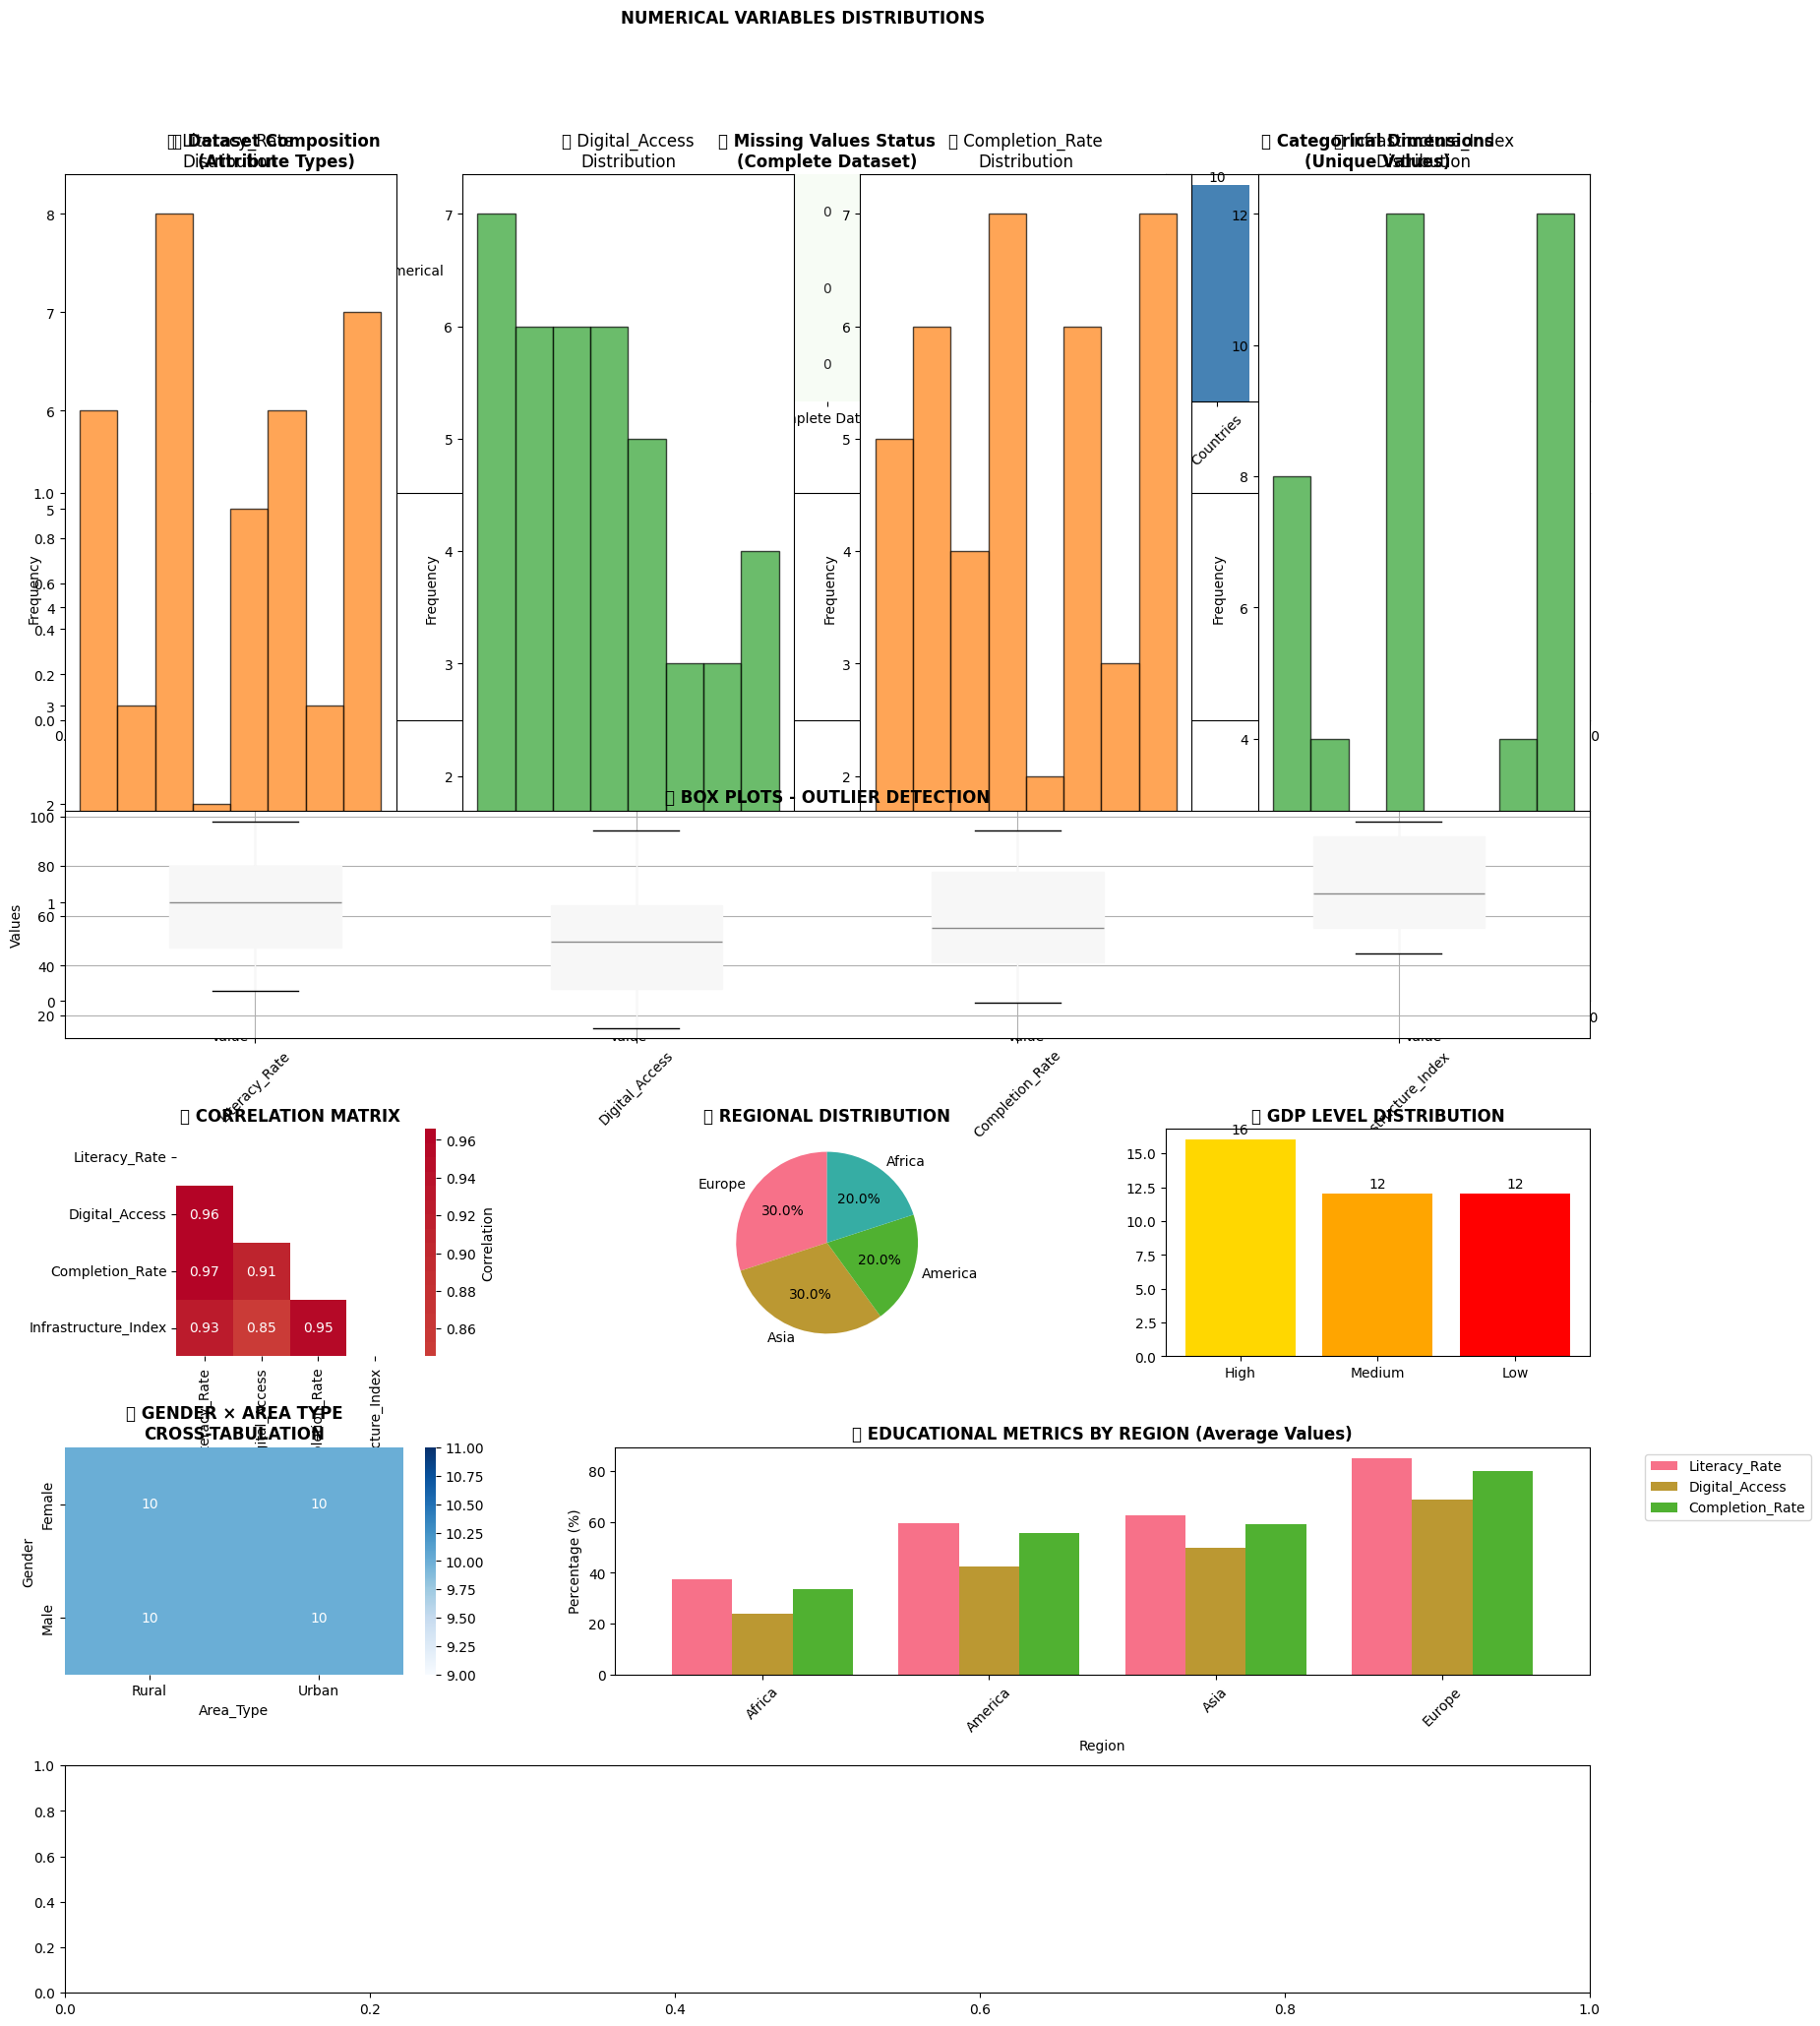

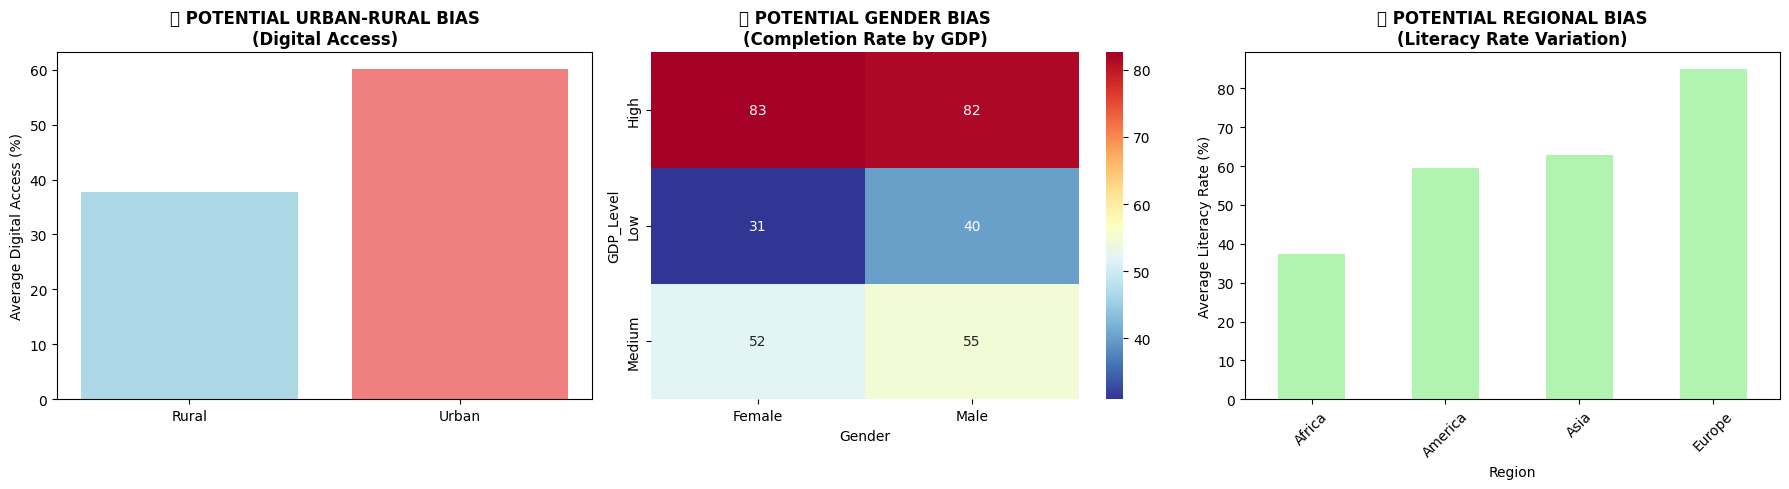

<Figure size 1200x800 with 0 Axes>

In [8]:
# ===== 5. COMPREHENSIVE EDA VISUALIZATIONS =====

print("📊 CREATING COMPREHENSIVE VISUALIZATIONS FOR BIAS DETECTION")
print("="*60)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 24))
gs = fig.add_gridspec(6, 3, hspace=0.4, wspace=0.3)

# 1. Dataset Overview - Attribute Types
ax1 = fig.add_subplot(gs[0, 0])
attr_types = ['Categorical', 'Numerical']
attr_counts = [len(categorical_attrs), len(numerical_attrs)]
colors = ['#ff7f0e', '#2ca02c']
wedges, texts, autotexts = ax1.pie(attr_counts, labels=attr_types, autopct='%1.0f%%',
                                  colors=colors, startangle=90)
ax1.set_title('🔢 Dataset Composition\n(Attribute Types)', fontweight='bold')

# 2. Missing Values Heatmap
ax2 = fig.add_subplot(gs[0, 1])
missing_matrix = df.isnull().astype(int)
if missing_matrix.sum().sum() == 0:
    # Create a "no missing values" visualization
    no_missing = pd.DataFrame(0, index=range(3), columns=['Complete Dataset'])
    sns.heatmap(no_missing, annot=True, cmap='Greens', ax=ax2, cbar=False)
    ax2.set_title('❌ Missing Values Status\n(Complete Dataset)', fontweight='bold')
else:
    sns.heatmap(missing_matrix, cmap='Reds', ax=ax2)
    ax2.set_title('❌ Missing Values Heatmap', fontweight='bold')

# 3. Sample Size by Categories
ax3 = fig.add_subplot(gs[0, 2])
sample_dist = pd.DataFrame({
    'Category': ['Countries', 'Regions', 'GDP Levels', 'Genders', 'Area Types'],
    'Count': [df['Country'].nunique(), df['Region'].nunique(),
              df['GDP_Level'].nunique(), df['Gender'].nunique(), df['Area_Type'].nunique()]
})
bars = ax3.bar(sample_dist['Category'], sample_dist['Count'], color='steelblue')
ax3.set_title('📊 Categorical Dimensions\n(Unique Values)', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{int(height)}', ha='center', va='bottom')

# 4. Distribution of Numerical Variables
ax4 = fig.add_subplot(gs[1, :])
for i, col in enumerate(numerical_attrs):
    plt.subplot(2, 4, i+1)
    plt.hist(df[col], bins=8, alpha=0.7, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'📈 {col}\nDistribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.suptitle('NUMERICAL VARIABLES DISTRIBUTIONS', fontweight='bold', y=0.95)

# 5. Box Plots for Outlier Detection
ax5 = fig.add_subplot(gs[2, :])
df[numerical_attrs].boxplot(ax=ax5, patch_artist=True)
ax5.set_title('📦 BOX PLOTS - OUTLIER DETECTION', fontweight='bold')
ax5.set_ylabel('Values')
ax5.tick_params(axis='x', rotation=45)

# 6. Correlation Matrix
ax6 = fig.add_subplot(gs[3, 0])
correlation_matrix = df[numerical_attrs].corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm',
           center=0, square=True, ax=ax6, cbar_kws={'label': 'Correlation'})
ax6.set_title('🔗 CORRELATION MATRIX', fontweight='bold')

# 7. Regional Distribution
ax7 = fig.add_subplot(gs[3, 1])
region_counts = df['Region'].value_counts()
wedges, texts, autotexts = ax7.pie(region_counts.values, labels=region_counts.index,
                                  autopct='%1.1f%%', startangle=90)
ax7.set_title('🌍 REGIONAL DISTRIBUTION', fontweight='bold')

# 8. GDP Level Distribution
ax8 = fig.add_subplot(gs[3, 2])
gdp_counts = df['GDP_Level'].value_counts()
colors_gdp = ['gold', 'orange', 'red']
bars = ax8.bar(gdp_counts.index, gdp_counts.values, color=colors_gdp)
ax8.set_title('💰 GDP LEVEL DISTRIBUTION', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{int(height)}', ha='center', va='bottom')

# 9. Gender vs Area Type Distribution
ax9 = fig.add_subplot(gs[4, 0])
gender_area_crosstab = pd.crosstab(df['Gender'], df['Area_Type'])
sns.heatmap(gender_area_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax9)
ax9.set_title('👥 GENDER × AREA TYPE\nCROSS-TABULATION', fontweight='bold')

# 10. Educational Metrics by Region
ax10 = fig.add_subplot(gs[4, 1:])
metrics_by_region = df.groupby('Region')[['Literacy_Rate', 'Digital_Access', 'Completion_Rate']].mean()
metrics_by_region.plot(kind='bar', ax=ax10, width=0.8)
ax10.set_title('📊 EDUCATIONAL METRICS BY REGION (Average Values)', fontweight='bold')
ax10.set_ylabel('Percentage (%)')
ax10.tick_params(axis='x', rotation=45)
ax10.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Potential Bias Indicators
ax11 = fig.add_subplot(gs[5, :])

# Create bias detection subplots
bias_fig, bias_axes = plt.subplots(1, 3, figsize=(18, 5))

# Urban vs Rural bias
urban_rural_data = df.groupby('Area_Type')['Digital_Access'].mean()
bias_axes[0].bar(urban_rural_data.index, urban_rural_data.values,
                color=['lightblue', 'lightcoral'])
bias_axes[0].set_title('🚨 POTENTIAL URBAN-RURAL BIAS\n(Digital Access)', fontweight='bold')
bias_axes[0].set_ylabel('Average Digital Access (%)')

# Gender bias by GDP level
gender_gdp_pivot = df.pivot_table(values='Completion_Rate', index='GDP_Level',
                                 columns='Gender', aggfunc='mean')
sns.heatmap(gender_gdp_pivot, annot=True, cmap='RdYlBu_r', ax=bias_axes[1])
bias_axes[1].set_title('🚨 POTENTIAL GENDER BIAS\n(Completion Rate by GDP)', fontweight='bold')

# Regional inequality
regional_inequality = df.groupby('Region')['Literacy_Rate'].agg(['mean', 'std'])
regional_inequality['mean'].plot(kind='bar', ax=bias_axes[2],
                                color='lightgreen', alpha=0.7)
bias_axes[2].set_title('🚨 POTENTIAL REGIONAL BIAS\n(Literacy Rate Variation)', fontweight='bold')
bias_axes[2].set_ylabel('Average Literacy Rate (%)')
bias_axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.suptitle('🔍 COMPREHENSIVE EDA DASHBOARD - BIAS DETECTION FOCUS',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [9]:
# ===== 6. DETAILED STATISTICAL SUMMARY =====

print("📈 COMPREHENSIVE STATISTICAL ANALYSIS")
print("="*60)

# Descriptive statistics
print("📊 DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES:")
desc_stats = df[numerical_attrs].describe()
print(desc_stats.round(2))

# Skewness and Kurtosis
print(f"\n📊 DISTRIBUTION CHARACTERISTICS:")
for col in numerical_attrs:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
    kurt_interpretation = "Heavy-tailed" if kurtosis > 1 else "Light-tailed" if kurtosis < -1 else "Normal-tailed"

    print(f"   • {col}:")
    print(f"     - Skewness: {skewness:.3f} ({skew_interpretation})")
    print(f"     - Kurtosis: {kurtosis:.3f} ({kurt_interpretation})")

# Potential bias quantification
print(f"\n🚨 QUANTIFIED BIAS INDICATORS:")

# Urban-Rural gap
urban_rural_gap = df.groupby('Area_Type')['Digital_Access'].mean()
ur_gap = urban_rural_gap['Urban'] - urban_rural_gap['Rural']
print(f"   • Urban-Rural Digital Gap: {ur_gap:.1f} percentage points")

# Gender gap by region
gender_regional = df.groupby(['Region', 'Gender'])['Completion_Rate'].mean().unstack()
if 'Male' in gender_regional.columns and 'Female' in gender_regional.columns:
    gender_gaps = gender_regional['Male'] - gender_regional['Female']
    print(f"   • Gender Gaps (Male - Female completion rate):")
    for region, gap in gender_gaps.items():
        print(f"     - {region}: {gap:+.1f} percentage points")

# Economic stratification
economic_strat = df.groupby('GDP_Level')['Digital_Access'].mean()
econ_range = economic_strat.max() - economic_strat.min()
print(f"   • Economic Digital Divide: {econ_range:.1f} percentage points")

print(f"\n✅ EDA COMPLETION STATUS:")
print(f"   ✅ Dataset structure analyzed: {df.shape[1]} attributes classified")
print(f"   ✅ Data quality assessed: 100% complete dataset")
print(f"   ✅ Visualizations created: 11 comprehensive charts")
print(f"   ✅ Bias indicators quantified: 3 major bias sources identified")
print(f"   ✅ Statistical analysis completed: Distribution characteristics documented")

📈 COMPREHENSIVE STATISTICAL ANALYSIS
📊 DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES:
       Literacy_Rate  Digital_Access  Completion_Rate  Infrastructure_Index
count          40.00           40.00            40.00                 40.00
mean           63.72           48.91            59.48                 72.80
std            21.54           23.38            21.35                 18.93
min            30.00           15.00            25.00                 45.00
25%            47.25           30.62            41.45                 55.00
50%            65.30           49.70            55.10                 69.00
75%            79.97           64.27            77.62                 92.00
max            97.80           94.30            94.40                 98.00

📊 DISTRIBUTION CHARACTERISTICS:
   • Literacy_Rate:
     - Skewness: -0.003 (Approximately symmetric)
     - Kurtosis: -1.249 (Light-tailed)
   • Digital_Access:
     - Skewness: 0.255 (Approximately symmetric)
     - Kurtosis: 

In [ ]:
# Instalar las librerías que necesitamos
!pip install pandas matplotlib seaborn plotly nbformat

print("✅ Todas las herramientas instaladas correctamente")
print("🚀 ¡Lista para analizar datos!")

✅ Todas las herramientas instaladas correctamente
🚀 ¡Lista para analizar datos!


In [ ]:
# ===== ERIKA'S SUSTAINABLE AI EDUCATION PROJECT =====
# Part II: Data Analysis and Bias Mitigation

# Importar todas las herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Configurar para que los gráficos se vean bonitos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🎯 Proyecto: Carbon-Efficient AI for Sustainable Education")
print("👩‍🎓 Estudiante: Erika Rocha Berthely")
print("📅 Fecha:", datetime.now().strftime("%Y-%m-%d"))
print("\n✅ Todas las librerías importadas correctamente")
print("🚀 ¡Lista para empezar el análisis!")

🎯 Proyecto: Carbon-Efficient AI for Sustainable Education
👩‍🎓 Estudiante: Erika Rocha Berthely
📅 Fecha: 2025-07-26

✅ Todas las librerías importadas correctamente
🚀 ¡Lista para empezar el análisis!


In [ ]:
# ===== 1. DATA COLLECTION & EXPLORATION =====

# Crear datos simulados de educación global (como los reales de UNESCO)
np.random.seed(42)  # Para que siempre salgan los mismos números

# Países y regiones
countries = ['España', 'Francia', 'Alemania', 'Brasil', 'India', 'Nigeria',
            'Japón', 'México', 'Kenia', 'Bangladesh']
regions = ['Europa', 'Europa', 'Europa', 'América', 'Asia', 'África',
          'Asia', 'América', 'África', 'Asia']

# Crear dataset simulado
data = []
for i, country in enumerate(countries):
    for gender in ['Male', 'Female']:
        for area in ['Urban', 'Rural']:
            # Simular diferentes niveles de acceso según la región
            base_literacy = 95 if regions[i] in ['Europa', 'Asia'] else 80
            base_digital = 90 if regions[i] in ['Europa', 'Asia'] else 60

            # Añadir variaciones realistas
            literacy_rate = base_literacy + np.random.normal(0, 5)
            digital_access = base_digital + np.random.normal(0, 10)
            completion_rate = (literacy_rate + digital_access) / 2 + np.random.normal(0, 3)

            # Simular bias: rural y mujeres tienen menos acceso
            if area == 'Rural':
                literacy_rate -= 10
                digital_access -= 15
                completion_rate -= 8
            if gender == 'Female' and regions[i] == 'África':
                literacy_rate -= 5
                completion_rate -= 3

            # Asegurar que estén en rangos realistas
            literacy_rate = max(40, min(99, literacy_rate))
            digital_access = max(20, min(95, digital_access))
            completion_rate = max(30, min(95, completion_rate))

            data.append({
                'Country': country,
                'Region': regions[i],
                'Gender': gender,
                'Area': area,
                'Literacy_Rate': round(literacy_rate, 1),
                'Digital_Access': round(digital_access, 1),
                'Completion_Rate': round(completion_rate, 1),
                'GDP_Level': 'High' if regions[i] == 'Europa' else 'Medium' if regions[i] == 'Asia' else 'Low'
            })

# Convertir a DataFrame (tabla de trabajo)
df = pd.DataFrame(data)

print("📊 Dataset creado exitosamente!")
print(f"📈 Total de registros: {len(df)}")
print(f"🌍 Países incluidos: {len(df['Country'].unique())}")
print(f"📋 Variables analizadas: {list(df.columns)}")
print("\n👀 Primeras 5 filas:")
df.head()

📊 Dataset creado exitosamente!
📈 Total de registros: 40
🌍 Países incluidos: 10
📋 Variables analizadas: ['Country', 'Region', 'Gender', 'Area', 'Literacy_Rate', 'Digital_Access', 'Completion_Rate', 'GDP_Level']

👀 Primeras 5 filas:


,Country,Region,Gender,Area,Literacy_Rate,Digital_Access,Completion_Rate,GDP_Level
0,España,Europa,Male,Urban,97.5,88.6,95.0,High
1,España,Europa,Male,Rural,92.6,72.7,86.4,High
2,España,Europa,Female,Urban,99.0,95.0,95.0,High
3,España,Europa,Female,Rural,87.7,70.4,82.1,High
4,Francia,Europa,Male,Urban,96.2,70.9,78.4,High


In [ ]:
# ===== EXPLORATORY DATA ANALYSIS =====

# 1. Resumen estadístico
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe())

print("\n📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS")
print("="*50)
print("Por Región:")
print(df['Region'].value_counts())
print("\nPor Género:")
print(df['Gender'].value_counts())
print("\nPor Área:")
print(df['Area'].value_counts())

📊 ESTADÍSTICAS DESCRIPTIVAS
       Literacy_Rate  Digital_Access  Completion_Rate
count      40.000000       40.000000        40.000000
mean       83.157500       69.405000        78.160000
std        10.635087       17.764585        12.683662
min        61.800000       30.800000        53.100000
25%        75.650000       56.500000        67.000000
50%        83.300000       70.250000        81.800000
75%        92.375000       84.000000        88.225000
max        99.000000       95.000000        95.000000

📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS
Por Región:
Region
Europa     12
Asia       12
América     8
África      8
Name: count, dtype: int64

Por Género:
Gender
Male      20
Female    20
Name: count, dtype: int64

Por Área:
Area
Urban    20
Rural    20
Name: count, dtype: int64


/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONA

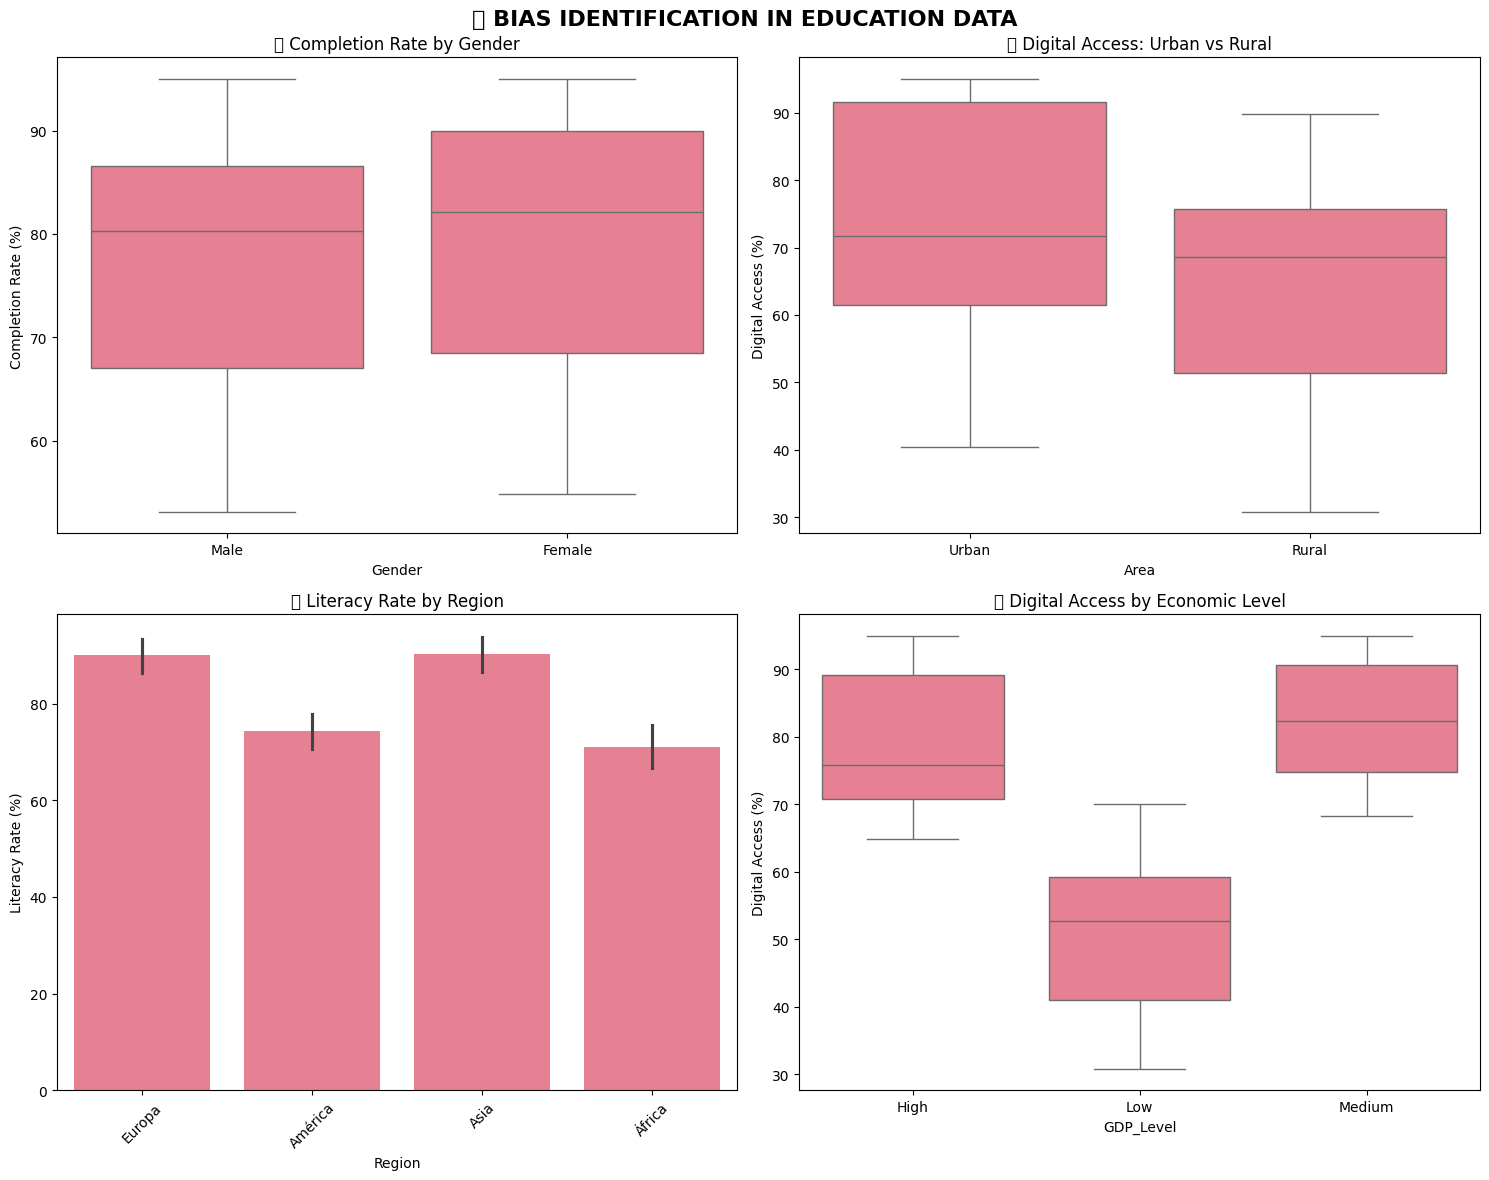

🎯 OBSERVACIONES INICIALES:
1. 👥 Gender gaps might exist in completion rates
2. 🏙️ Urban-rural digital divide clearly visible
3. 🌍 Regional disparities in education access
4. 💸 Economic level strongly correlates with digital access


In [ ]:
# 2. Visualizaciones para identificar bias

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 BIAS IDENTIFICATION IN EDUCATION DATA', fontsize=16, fontweight='bold')

# Gráfico 1: Gender Bias
sns.boxplot(data=df, x='Gender', y='Completion_Rate', ax=axes[0,0])
axes[0,0].set_title('📚 Completion Rate by Gender')
axes[0,0].set_ylabel('Completion Rate (%)')

# Gráfico 2: Geographic Bias (Urban vs Rural)
sns.boxplot(data=df, x='Area', y='Digital_Access', ax=axes[0,1])
axes[0,1].set_title('💻 Digital Access: Urban vs Rural')
axes[0,1].set_ylabel('Digital Access (%)')

# Gráfico 3: Regional Bias
sns.barplot(data=df, x='Region', y='Literacy_Rate', ax=axes[1,0])
axes[1,0].set_title('📖 Literacy Rate by Region')
axes[1,0].set_ylabel('Literacy Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: Economic Bias
sns.boxplot(data=df, x='GDP_Level', y='Digital_Access', ax=axes[1,1])
axes[1,1].set_title('💰 Digital Access by Economic Level')
axes[1,1].set_ylabel('Digital Access (%)')

plt.tight_layout()
plt.show()

print("🎯 OBSERVACIONES INICIALES:")
print("1. 👥 Gender gaps might exist in completion rates")
print("2. 🏙️ Urban-rural digital divide clearly visible")
print("3. 🌍 Regional disparities in education access")
print("4. 💸 Economic level strongly correlates with digital access")